In [1]:
import os

import pandas as pd

from helpers.cell_type_naming import weird_to_nice

# load all the things (tumors and proportions by cell type)

## load the truth (cell type proportions of derek's in silico mixtures)

In [2]:
truth = pd.read_csv(
    "gs://liulab/derek/simulations/experiments/generate_cohorts_for_emma/ctp_sim_0.5sd.txt",
    sep="\t",
    index_col=0,
)
truth.rename_axis(columns="cell_type", index="mixture_id", inplace=True)
truth.rename(columns=weird_to_nice, inplace=True)

## derek's preds

In [3]:
def load_csx_results(uri):
    df = pd.read_csv(uri, sep="\t", index_col=0)
    df = df.iloc[:, :-3]  # ignore last three columns, which are test statistics
    df.rename(
        columns=weird_to_nice, index=lambda old: int(old.split(".")[-1]), inplace=True
    )
    df.rename_axis(columns="cell_type", index="mixture_id", inplace=True)
    return df

In [4]:
results_derek = load_csx_results(
    "gs://liulab/derek/simulations/experiments/cibersortx/cibersortx_sim_0.5sd/CIBERSORTxGEP_Job3_Fractions-Adjusted.txt"
)

## my preds

In [5]:
results_docker = load_csx_results(
    "gs://liulab/csx-runs/20210806_215938/out/CIBERSORTx_Results.txt"
)

## my preds, for each cell exclusion

In [6]:
import glob

experiment_dirs = glob.glob(
    "/mnt/buckets/liulab/csx_experiments_excluding_cell_types_w_absolute_counts/*"
)
experiment_dirs

['/mnt/buckets/liulab/csx_experiments_excluding_cell_types_w_absolute_counts/without_B',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types_w_absolute_counts/without_CAF',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types_w_absolute_counts/without_Endothelial',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types_w_absolute_counts/without_Macrophage',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types_w_absolute_counts/without_Malignant',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types_w_absolute_counts/without_NK',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types_w_absolute_counts/without_T_CD4',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types_w_absolute_counts/without_T_CD8']

In [7]:
os.path.basename(experiment_dirs[0])

'without_B'

## concat all results

In [8]:
dict_of_everything = dict()
dict_of_everything["truth"] = truth
dict_of_everything["derek"] = results_derek
dict_of_everything["me"] = results_docker
dict_of_everything.update(
    {
        os.path.basename(experiment_dir): load_csx_results(
            os.path.join(experiment_dir, "out", "CIBERSORTx_Results.txt")
        )
        for experiment_dir in experiment_dirs
    }
)
all_results = pd.concat(dict_of_everything, names=["source"])

In [9]:
all_results.head(5)

cell_type          Malignant  Endothelial       CAF     T CD8        NK  \
source mixture_id                                                         
truth  1               0.725     0.030567  0.053134  0.014234  0.019605   
       2               0.207     0.088145  0.153220  0.041046  0.056533   
       3               0.566     0.048241  0.083856  0.022464  0.030940   
       4               0.841     0.017673  0.030721  0.008230  0.011335   
       5               0.683     0.035236  0.061250  0.016408  0.022599   

cell_type          Macrophage     T CD4         B  P-value  
source mixture_id                                           
truth  1             0.025273  0.085953  0.046233      NaN  
       2             0.072878  0.247859  0.133320      NaN  
       3             0.039885  0.135650  0.072964      NaN  
       4             0.014612  0.049697  0.026731      NaN  
       5             0.029133  0.099081  0.053294      NaN

In [10]:
all_results.sample(20)

cell_type                          Malignant  Endothelial       CAF     T CD8  \
source              mixture_id                                                  
without_NK          28         -0.000000e+00    -0.000000 -0.000000 -0.000000   
without_B           49         -1.000000e-16    -0.000000 -0.000000 -0.000000   
without_Macrophage  74          0.000000e+00     0.000000  0.000000  0.000000   
without_Endothelial 67         -0.000000e+00          NaN -0.000000 -0.000000   
without_NK          8          -0.000000e+00    -0.000000 -0.000000 -0.000000   
without_T_CD8       77         -1.000000e-16    -0.000000 -0.000000       NaN   
without_Endothelial 91         -1.000000e-16          NaN -0.000000 -0.000000   
without_CAF         27          0.000000e+00     0.000000       NaN  0.000000   
                    85         -1.000000e-16    -0.000000       NaN -0.000000   
without_Malignant   35                   NaN     0.000000  0.000000  0.000000   
without_T_CD4       19          0.000000e+00     0.000000  0.000000  0.000000   
without_NK          86         -1.000000e-16    -0.000000 -0.000000 -0.000000   
without_Endothelial 59         -0.000000e+00          NaN -0.000000 -0.000000   
without_CAF         67         -0.000000e+00    -0.000000       NaN -0.000000   
without_NK          42         -0.000000e+00    -0.000000 -0.000000 -0.000000   
without_Endothelial 50         -0.000000e+00          NaN -0.000000 -0.000000   
derek               29          4.294509e-01     0.069761  0.068520  0.034724   
me                  43          8.453671e-01     0.001340  0.001271  0.009901   
truth               71          3.730000e-01     0.069693  0.121147  0.032454   
without_T_CD4       100        -0.000000e+00    -0.000000 -0.000000 -0.000000   

cell_type                             NK  Macrophage         T CD4         B  \
source              mixture_id                                                 
without_NK          28               NaN   -0.000000 -0.000000e+00 -0.000000   
without_B           49         -0.000000   -0.000000 -0.000000e+00       NaN   
without_Macrophage  74          0.000000         NaN  0.000000e+00  0.000000   
without_Endothelial 67         -0.000000   -0.000000 -0.000000e+00 -0.000000   
without_NK          8                NaN   -0.000000 -0.000000e+00 -0.000000   
without_T_CD8       77         -0.000000   -0.000000 -0.000000e+00 -0.000000   
without_Endothelial 91         -0.000000   -0.000000 -0.000000e+00 -0.000000   
without_CAF         27          0.000000    0.000000  0.000000e+00  0.000000   
                    85         -0.000000   -0.000000 -1.000000e-16 -0.000000   
without_Malignant   35          0.000000    0.000000  0.000000e+00  0.000000   
without_T_CD4       19          0.000000    0.000000           NaN  0.000000   
without_NK          86               NaN   -0.000000 -0.000000e+00 -0.000000   
without_Endothelial 59         -0.000000   -0.000000 -1.000000e-16 -0.000000   
without_CAF         67         -0.000000   -0.000000 -0.000000e+00 -0.000000   
without_NK          42               NaN   -0.000000 -0.000000e+00 -0.000000   
without_Endothelial 50         -0.000000   -0.000000 -0.000000e+00 -0.000000   
derek               29          0.035076    0.084985  2.019945e-01  0.075489   
me                  43          0.008865    0.033230  9.614747e-02  0.003877   
truth               71          0.044699    0.057622  1.959739e-01  0.105412   
without_T_CD4       100        -0.000000   -0.000000           NaN -0.000000   

cell_type                       P-value  
source              mixture_id           
without_NK          28           9999.0  
without_B           49           9999.0  
without_Macrophage  74           9999.0  
without_Endothelial 67           9999.0  
without_NK          8            9999.0  
without_T_CD8       77           9999.0  
without_Endothelial 91           9999.0  
without_CAF         27           9999.0  
                    85           999

In [11]:
all_results.iloc[::100]

,cell_type,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B,P-value
source,mixture_id,,,,,,,,,
truth,1,7.250000e-01,0.030567,0.053134,0.014234,0.019605,0.025273,0.085953,0.046233,NaN
derek,1,6.345367e-01,0.009402,0.068497,0.013531,0.027027,0.055589,0.154121,0.037297,NaN
me,1,7.260177e-01,0.012055,0.040918,0.027831,0.022251,0.039219,0.100657,0.031050,NaN
without_B,1,3.000000e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,9999.0
without_CAF,1,1.000000e-16,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,9999.0
without_Endothelial,1,1.000000e-16,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9999.0
without_Macrophage,1,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,9999.0
without_Malignant,1,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9999.0
without_NK,1,1.000000e-16,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,9999.0


In [12]:
all_results.stack().unstack("source").corr()

source,truth,derek,me,without_B,without_CAF,without_Endothelial,without_Macrophage,without_Malignant,without_NK,without_T_CD4,without_T_CD8
source,,,,,,,,,,,
truth,1.000000,0.772707,0.732296,0.042883,0.013985,0.049852,-0.000158,0.021264,-0.013153,0.025001,0.043228
derek,0.772707,1.000000,0.986093,0.036684,0.060308,0.056372,0.000192,0.038433,-0.029288,0.078939,0.039770
me,0.732296,0.986093,1.000000,0.046128,0.061099,0.046395,0.001446,0.031790,-0.026788,0.088198,0.035967
without_B,0.042883,0.036684,0.046128,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
without_CAF,0.013985,0.060308,0.061099,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
without_Endothelial,0.049852,0.056372,0.046395,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
without_Macrophage,-0.000158,0.000192,0.001446,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
without_Malignant,0.021264,0.038433,0.031790,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
without_NK,-0.013153,-0.029288,-0.026788,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### upload all results to bigquery for easier plotting

https://console.cloud.google.com/bigquery?project=keen-dispatch-316219

In [13]:
all_results.stack().to_frame("fraction").reset_index().to_gbq(
    "csx_runs.cell_type_exlusion", if_exists="replace"
)

1it [00:03,  3.89s/it]


# visualize results

In [14]:
import plotly.io

plotly.io.renderers.default = "jupyterlab+png"

import plotly.express as px
import plotly.graph_objects as go

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning:

invalid value encountered in double_scalars



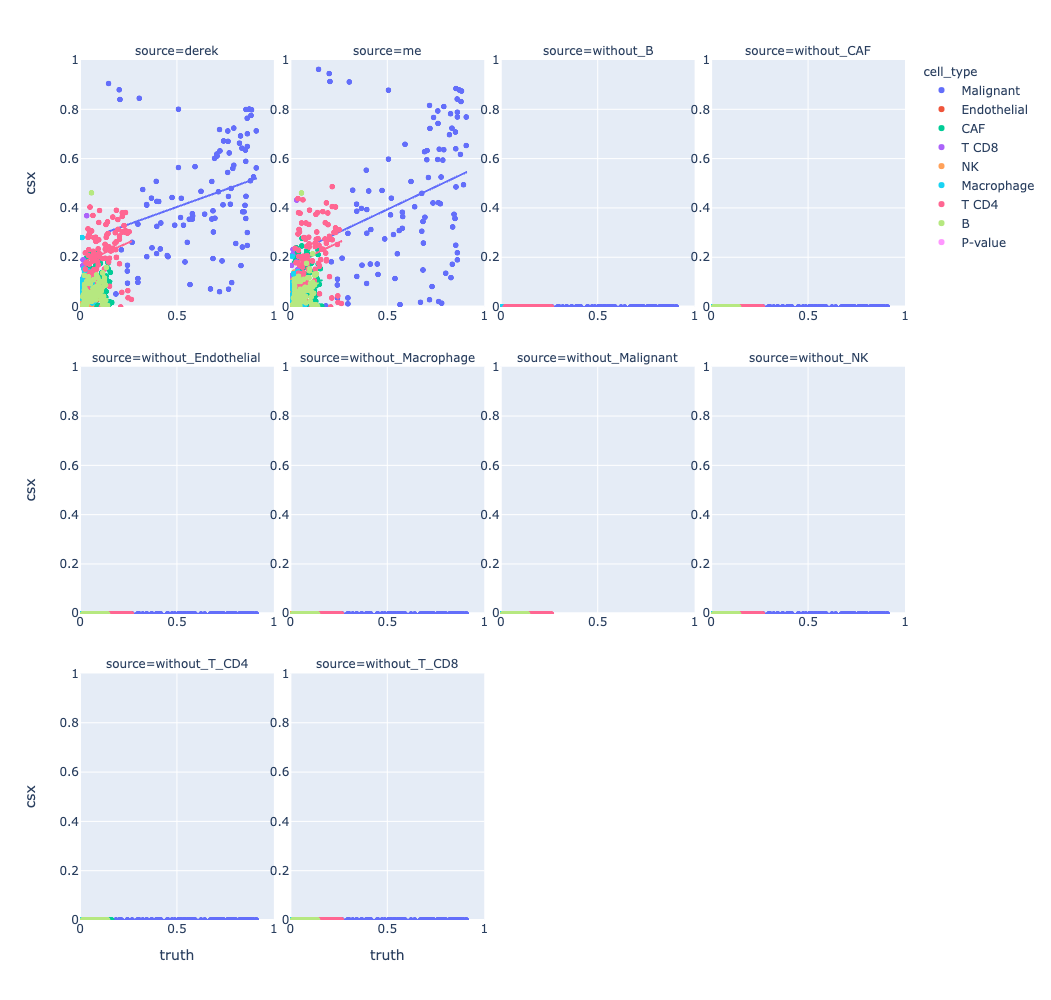

In [15]:
fig = px.scatter(
    pd.concat(
        {
            result: pd.concat(
                {
                    "csx": all_results.stack().loc[result],
                    "truth": all_results.stack().loc["truth"],
                },
                axis=1,
            )
            for result in all_results.index.levels[0]
            if result != "truth"
        }
    )
    .reset_index()
    .rename(columns={"level_0": "source"}),
    x="truth",
    y="csx",
    facet_col="source",
    color="cell_type",
    trendline="ols",
    facet_col_wrap=4,
)
fig.update_layout(
    width=1200,
    height=1000,
)
fig.update_xaxes(
    range=(0, 1),
    showticklabels=True,
)
fig.update_yaxes(
    range=(0, 1),
    showticklabels=True,
)
fig

In [16]:
all_results.stack().unstack("source").reset_index()

source,mixture_id,cell_type,truth,derek,me,without_B,without_CAF,without_Endothelial,without_Macrophage,without_Malignant,without_NK,without_T_CD4,without_T_CD8
0,1,Malignant,0.725000,0.634537,0.726018,3.000000e-16,1.000000e-16,1.000000e-16,0.0,NaN,1.000000e-16,3.000000e-16,2.000000e-16
1,1,Endothelial,0.030567,0.009402,0.012055,0.000000e+00,0.000000e+00,NaN,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
2,1,CAF,0.053134,0.068497,0.040918,0.000000e+00,NaN,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
3,1,T CD8,0.014234,0.013531,0.027831,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,NaN
4,1,NK,0.019605,0.027027,0.022251,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,100,NK,0.029799,0.064513,0.064021,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,NaN,-0.000000e+00,-0.000000e+00
896,100,Macrophage,0.038415,0.038568,0.031413,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.0,-0.000000e+00,-0.000000e+00,-0.000000e+00
897,100,T CD4,0.130649,0.198272,0.153575,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,-0.000000e+00,NaN,-0.000000e+00
898,100,B,0.070274,0.110671,0.112602,NaN,0.000000e+00,0.000000e+00,0.0,0.0,-0.000000e+00,-0.000000e+00,-0.000000e+00


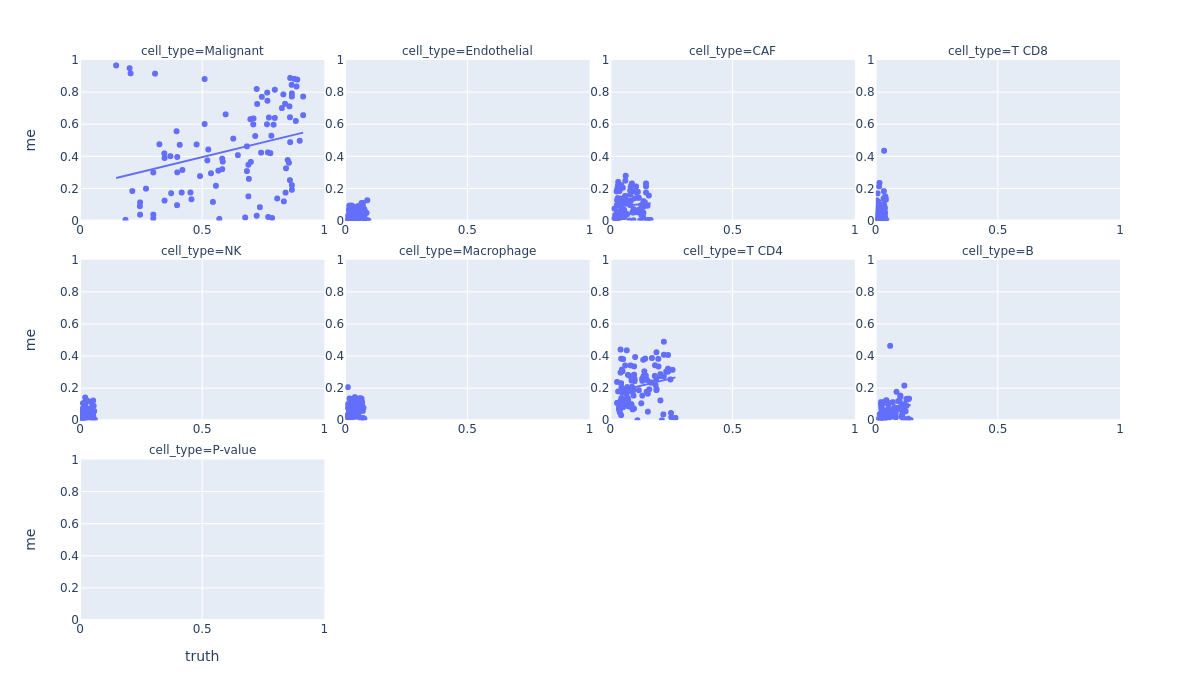

In [17]:
fig = px.scatter(
    all_results.stack().unstack("source").reset_index(),
    x="truth",
    y="me",
    facet_col="cell_type",
    trendline="ols",
    facet_col_wrap=4,
)
fig.update_layout(
    width=1200,
    height=700,
)
fig.update_xaxes(
    range=(0, 1),
    showticklabels=True,
)
fig.update_yaxes(
    range=(0, 1),
    #     scaleanchor="x", scaleratio=1,
    showticklabels=True,
)
fig

In [18]:
df = (
    pd.concat(
        {
            result: pd.concat(
                {
                    "csx": all_results.stack().loc[result],
                    "truth": all_results.stack().loc["truth"],
                },
                axis=1,
            )
            for result in all_results.index.levels[0]
            if result != "truth"
        }
    )
    .reset_index()
    .rename(columns={"level_0": "source"})
)
df["absolute error"] = (df["csx"] - df["truth"]).abs()
df["ratio of pred to true"] = (df["csx"]) / (df["truth"] + 1e-10)
import numpy as np

df["log2 ratio of pred to true"] = np.log(
    (df["csx"] + 1e-10) / (df["truth"] + 1e-10)
) / np.log(2)
df

,source,mixture_id,cell_type,csx,truth,absolute error,ratio of pred to true,log2 ratio of pred to true
0,derek,1,Malignant,0.634537,0.725000,0.090463,0.875223,-0.192277
1,derek,1,Endothelial,0.009402,0.030567,0.021165,0.307577,-1.700978
2,derek,1,CAF,0.068497,0.053134,0.015363,1.289126,0.366393
3,derek,1,T CD8,0.013531,0.014234,0.000703,0.950615,-0.073067
4,derek,1,NK,0.027027,0.019605,0.007422,1.378578,0.463180
...,...,...,...,...,...,...,...,...
8795,without_T_CD8,100,Malignant,-0.000000,0.582000,0.582000,-0.000000,-32.438372
8796,without_T_CD8,100,NK,-0.000000,0.029799,0.029799,-0.000000,-28.150699
8797,without_T_CD8,100,P-value,9999.000000,NaN,NaN,NaN,NaN
8798,without_T_CD8,100,T CD4,-0.000000,0.130649,0.130649,-0.000000,-30.283052


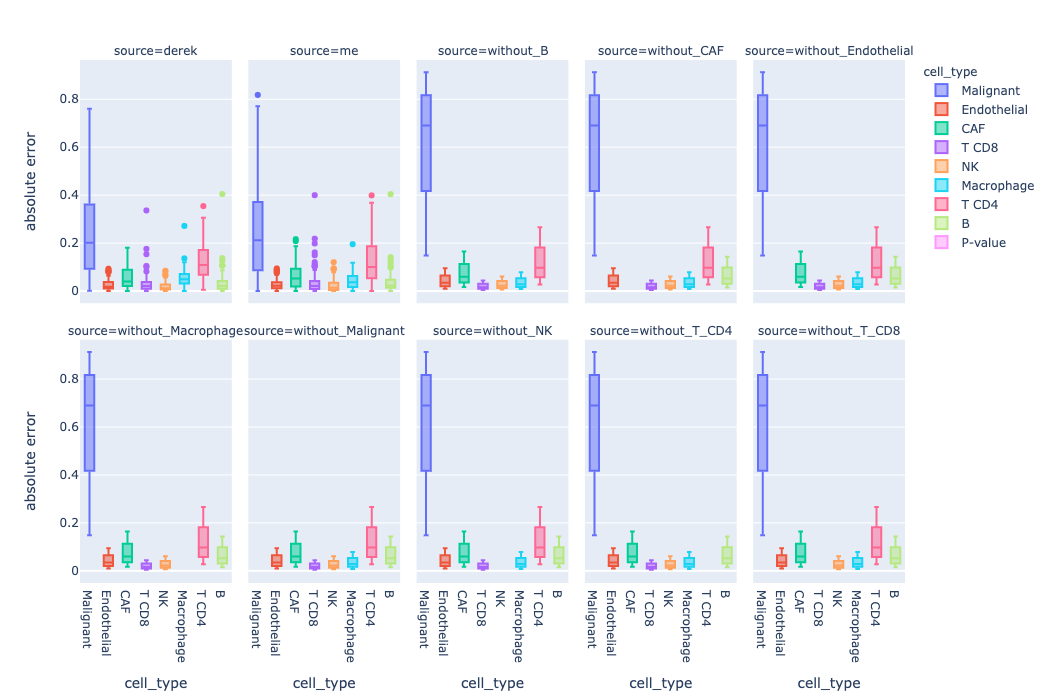

In [19]:
fig = px.box(
    df,
    x="cell_type",
    y="absolute error",
    facet_col="source",
    color="cell_type",
    facet_col_wrap=5,
)
fig.update_layout(
    width=1200,
    height=700,
)
fig.show()

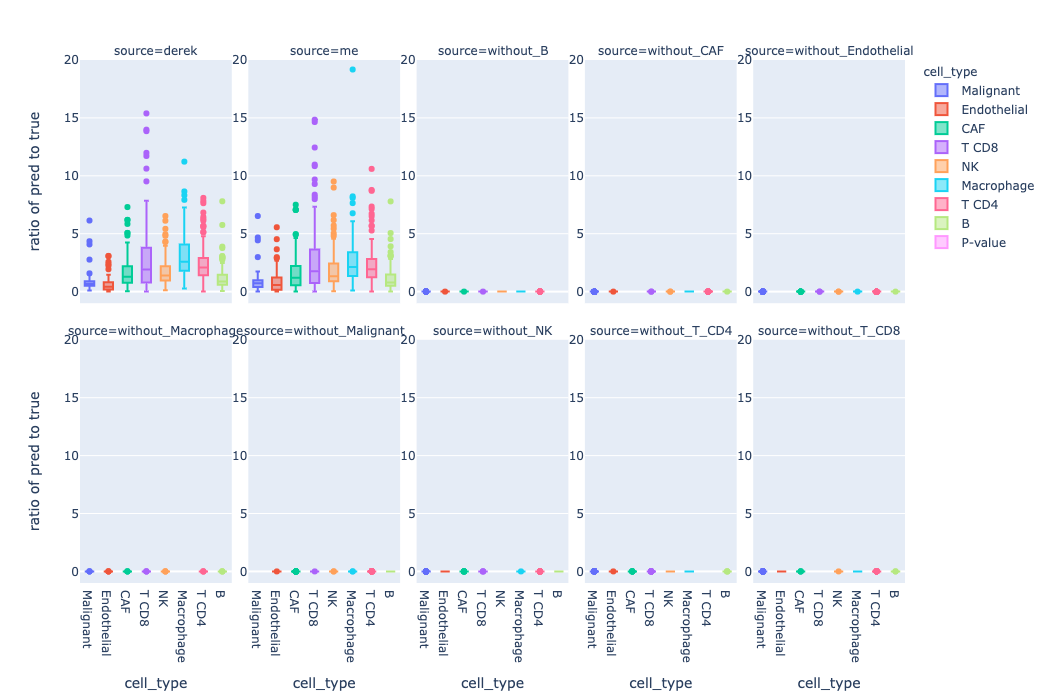

In [20]:
fig = px.box(
    df,
    x="cell_type",
    y="ratio of pred to true",
    facet_col="source",
    color="cell_type",
    facet_col_wrap=5,
)
fig.update_yaxes(
    range=(-1, 20),
    #     scaleanchor="x", scaleratio=1,
    showticklabels=True,
)
fig.update_layout(
    width=1200,
    height=700,
)
fig.show()

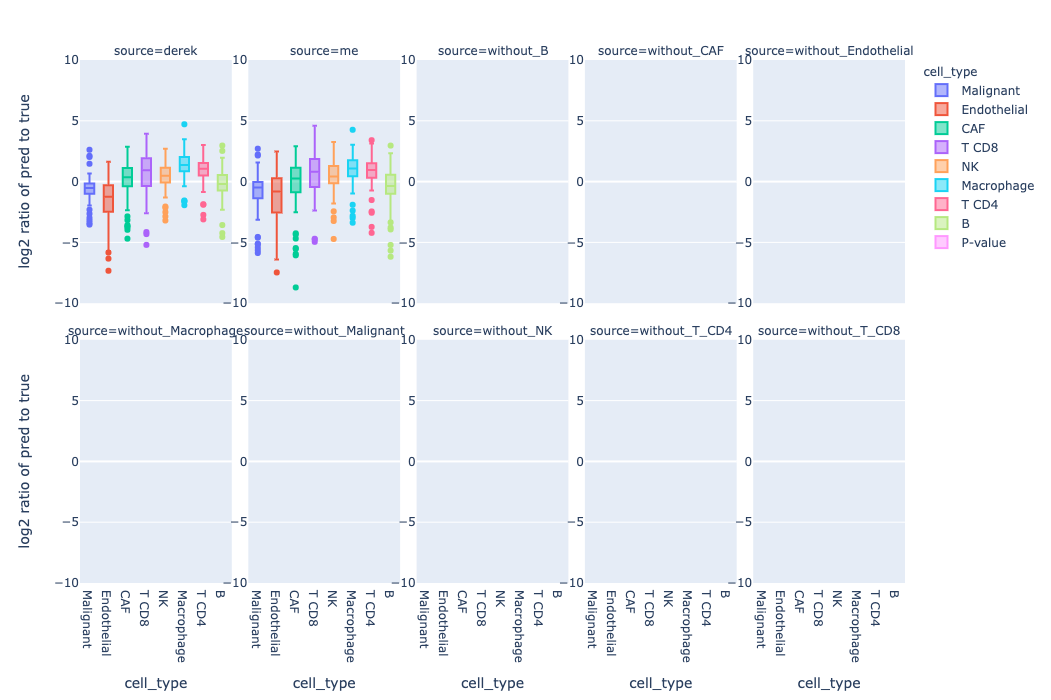

In [21]:
fig = px.box(
    df,
    x="cell_type",
    y="log2 ratio of pred to true",
    facet_col="source",
    color="cell_type",
    facet_col_wrap=5,
)
fig.update_yaxes(
    range=(-10, 10),
    #     scaleanchor="x", scaleratio=1,
    showticklabels=True,
)
fig.update_layout(
    width=1200,
    height=700,
)
fig.show()

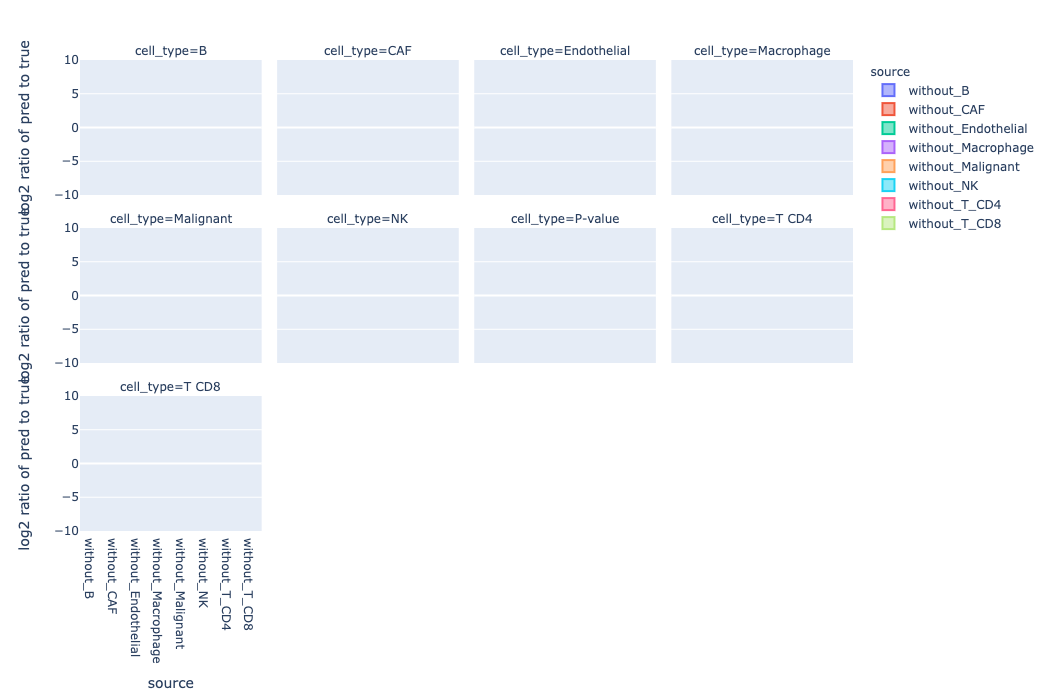

In [22]:
fig = px.box(
    df[df["source"].str.contains("without")],
    x="source",
    y="log2 ratio of pred to true",
    facet_col="cell_type",
    color="source",
    facet_col_wrap=4,
)
fig.update_yaxes(
    range=(-10, 10),
    #     scaleanchor="x", scaleratio=1,
    #     showticklabels=True,
)
fig.update_layout(
    width=1200,
    height=700,
)
fig.show()

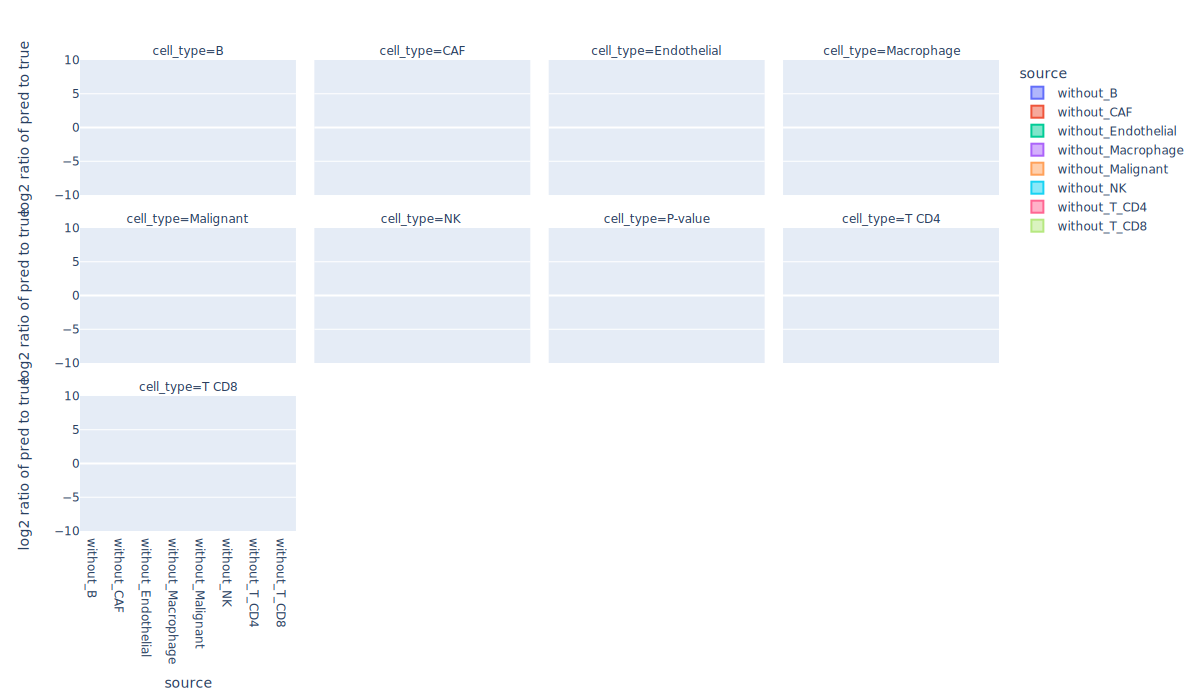

In [23]:
fig.show(renderer="svg")